In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import backtest_kz as bt
from data_manipulation import DataManipulation


import warnings
warnings.simplefilter(action = 'ignore', category = pd.errors.PerformanceWarning)
%matplotlib inline

In [2]:
SYMBOL = 'SASA.IS'
scale = 1
range = [5, 10, 15, 20, 25, 30, 35, 40, 50, 99]
range = [i*scale for i in range]
period = '1y'
interval = '1h'
start_date = ''
end_data = ''
source = 'yahoo'

In [3]:
data = DataManipulation(SYMBOL, source, range, period=period, interval=interval, scale=scale)

In [4]:
df = data.df
df.head()

,Open,High,Low,Close,Volume,sma_5,sma_10,sma_15,sma_20,sma_25,...,roc_25,roc_30,roc_35,roc_40,roc_50,roc_99,candlestick_pattern,candle_label,d_r,feature_label
Datetime,,,,,,,,,,,,,,,,,,,,,
2022-02-07 17:30:00+03:00,23.9900,23.9900,23.7800,23.9300,2025063,23.7280,23.5770,23.4373,23.4155,23.4440,...,0.9279,-0.5816,-2.0467,2.0904,0.2094,-4.0497,NO_PATTERN,0.0000,-0.0025,1.0000
2022-02-08 10:30:00+03:00,24.6800,24.7000,24.2400,24.3900,3076113,23.8940,23.6510,23.5207,23.4620,23.4736,...,3.1290,2.0502,0.3704,-0.8940,2.4360,-2.0088,CDLBELTHOLD_Bear,-1.0000,0.0192,0.0000
2022-02-08 11:30:00+03:00,24.3900,24.3900,24.2500,24.3000,1154868,24.0600,23.7070,23.6000,23.5000,23.5048,...,3.3163,2.0580,0.3303,-0.5728,2.6616,0.9136,CDLSHORTLINE_Bear,-1.0000,-0.0037,0.0000
2022-02-08 12:30:00+03:00,24.3000,24.3400,24.1000,24.2600,1308341,24.1740,23.8130,23.6827,23.5460,23.5300,...,2.6661,1.8044,0.0825,-1.1007,2.2766,-1.1813,CDLSPINNINGTOP_Bear,-1.0000,-0.0016,0.0000
2022-02-08 13:30:00+03:00,24.2500,24.3100,23.8900,23.9300,1627743,24.1620,23.8770,23.7467,23.5835,23.5468,...,1.7865,0.3775,-0.9930,-2.1268,0.8428,-2.0066,CDLLONGLINE_Bear,-1.0000,-0.0136,1.0000


In [5]:
bt_dict_result = bt.make_backtest(df, range)
bt_dict_result

no entry macd


[((2426.155033443377, 25), 'tema_30_40'),
 ((2399.014192759385, 9), 'ema_25_35'),
 ((2394.670267862191, 83), 'wma_5_10'),
 ((2391.223668705875, 64), 'dema_5_20'),
 ((2389.9522155276736, 87), 'TRIMA_5_10'),
 ((2325.1465801774475, 34), 't3_5_15'),
 ((2308.790047637541, 57), 'kama_5_10'),
 ((2270.5876587722964, 77), 'sma_5_10'),
 ((2181.7169376174365, 58), 'cmo_15_99'),
 ((1520.5616491171227, 6), 'rsi_10'),
 ((1446.6043090312712, 10), 'cci_30'),
 ((1355.8901312956414, 13), 'band_50'),
 ((1318.5952143039585, 22), 'wllr_20'),
 ((1280.425369051869, 25), 'mfi_5'),
 ((1272.1949808228376, 35), 'band_99')]

In [6]:
bt.write_backtest_result(df, SYMBOL, period, interval, bt_dict_result)

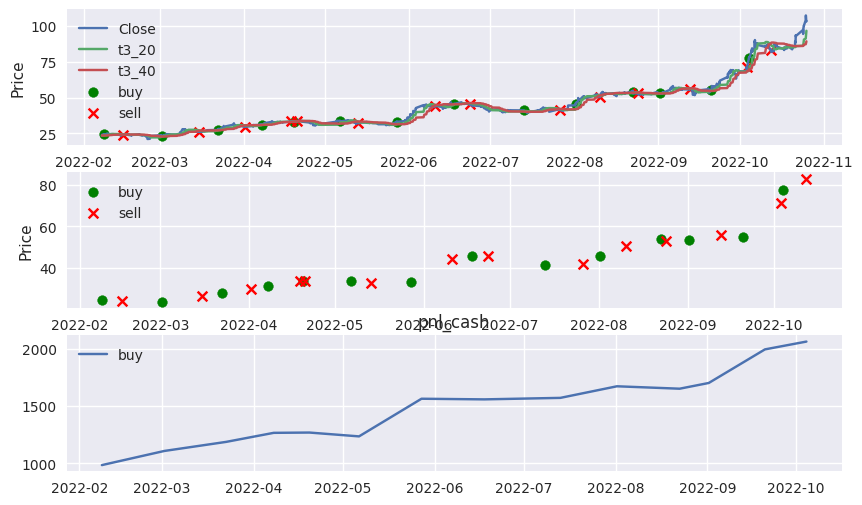

In [7]:
trade_sheet = bt.bt_crossover(df, 't3_20', 't3_40')
bt.bt_plot_crossover(df, trade_sheet, 't3_20', 't3_40')

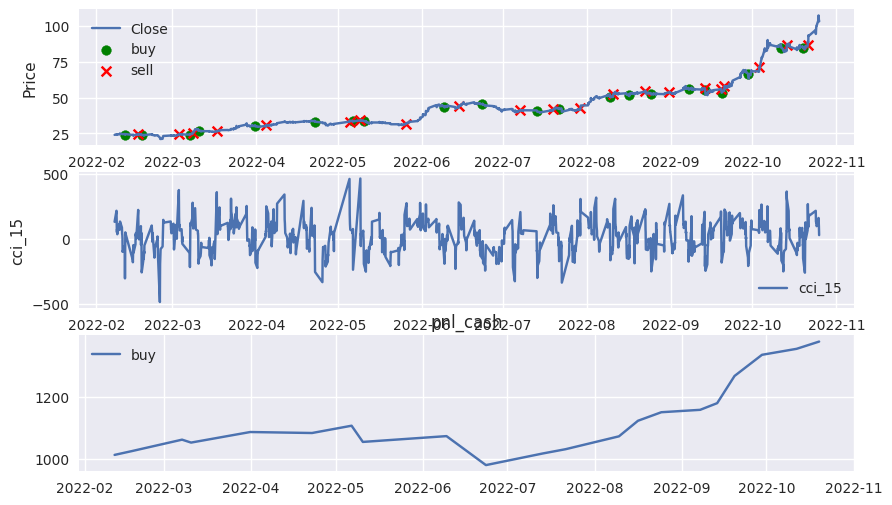

In [8]:
trade_sheet = bt.bt_threshold(df, 'cci_15', 200, -150)
bt.bt_plot_ind(df, trade_sheet, 'cci_15')

In [22]:
from twitter_collection import TwitterCollection
client = TwitterCollection()

Authentication Successfull


In [24]:
query_list = ['btc','eth','xrp','bnb', 'luna', 'matic', 'sol', 'ens', 'rune', 'dot']
query_list_bist = ['sumas', 'orma', 'xu100', 'bist', 'sasa']

In [10]:
query = 'sasa'
path_df = f'./tweets_data/{query}/'
file_df = f'{query}_tweets.csv'
df_tweet = client.get_tweets_df('sasa', path_df, file_df)
print(df_tweet.shape)
df_tweet.head()

(365098, 10)


,Unnamed: 0.1,created_at,text,source,name,username,location,verified,description,Unnamed: 0
0,0,2022-10-25 12:53:47+00:00,Mal kapma günü. Malını kaptıranlar üzülür #bis...,Twitter for iPhone,Yatırımcı Kedi,yatirimcikedi,NaN,False,NaN,NaN
1,1,2022-10-25 12:53:13+00:00,#sasa devletin hissesi olduğunu bu kadar belli...,Twitter for iPhone,Sarı,iamSari55,NaN,False,Kendine Yatırımcı ( tweetlerim kendime notları...,NaN
2,2,2022-10-25 12:52:50+00:00,+++ Sterlinin son aylarda kaybettiği değeri te...,Twitter Web App,M.Deniz Asoğlu,mdenizasoglu,Kadıköy/İstanbul,False,"Tesadüf,tedbil-i kıyafet gezen Tanrıdır….Çokça...",NaN
3,3,2022-10-25 12:52:38+00:00,#Barbaros tavanladi saldı #bist100 saolsun #sa...,Twitter for Android,Mert SARIKAN,mert_sarikan,NaN,False,⚡Engineer | Designer | İnvestor\n\n#bist100 #x...,NaN
4,4,2022-10-25 12:50:11+00:00,#sasa düşmemeye yemin etmiş,Twitter for iPhone,Borsatrendiniz,borsatrendiniz,"İstanbul, Türkiye",False,Bu twitter hesabı dışında başka herhangi bir h...,NaN


In [ ]:

query_list = ['btc','eth','xrp','bnb', 'luna', 'matic', 'sol', 'ens']
query_list_bist = ['sumas', 'orma', 'xu100', 'bist', 'sasa']
import datetime
from datetime import datetime as dt 
from datetime import timedelta as td

now = datetime.datetime.now(datetime.timezone.utc)

# finish_time = now - td(hours=24*6)
for i in query_list:
    df_tweets = client.get_tweets_with_interval(i, 'en', hour=24*1)
    print(f'shape of {i} tweets df: {df_tweets.shape}')
    path_df = f'./tweets_data/{i}/'
    file_df = f'{i}_tweets.csv'
    client.write_tweets_csv(df_tweets, path_df, file_df)

In [21]:
query = 'sasa'
path_df = f'./tweets_data/{query}/'
file_df = f'{query}_tweets.csv'
df_tweet = client.get_tweets_df('sasa', path_df, file_df)
print(df_tweet.shape)

(365098, 9)


,index_col,created_at,text,source,name,username,location,verified,description
0,0,2022-10-25 12:53:47+00:00,Mal kapma günü. Malını kaptıranlar üzülür #bis...,Twitter for iPhone,Yatırımcı Kedi,yatirimcikedi,NaN,False,NaN
1,1,2022-10-25 12:53:13+00:00,#sasa devletin hissesi olduğunu bu kadar belli...,Twitter for iPhone,Sarı,iamSari55,NaN,False,Kendine Yatırımcı ( tweetlerim kendime notları...
2,2,2022-10-25 12:52:50+00:00,+++ Sterlinin son aylarda kaybettiği değeri te...,Twitter Web App,M.Deniz Asoğlu,mdenizasoglu,Kadıköy/İstanbul,False,"Tesadüf,tedbil-i kıyafet gezen Tanrıdır….Çokça..."
3,3,2022-10-25 12:52:38+00:00,#Barbaros tavanladi saldı #bist100 saolsun #sa...,Twitter for Android,Mert SARIKAN,mert_sarikan,NaN,False,⚡Engineer | Designer | İnvestor\n\n#bist100 #x...
4,4,2022-10-25 12:50:11+00:00,#sasa düşmemeye yemin etmiş,Twitter for iPhone,Borsatrendiniz,borsatrendiniz,"İstanbul, Türkiye",False,Bu twitter hesabı dışında başka herhangi bir h...
